In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/cru/cru_ts4.06.1901.2021.pre.dat.nc')
 

data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1452)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 299)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1981-02-15 1981-03-16 ... 2005-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 100)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1981-06-16 1981-07-16 ... 2005-09-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:  (time: 100, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1981-06-16 1981-07-16 ... 2005-09-16
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Data variables:
    pre      (time, lat, lon) float64 nan nan nan nan ... 106.5 119.5 132.0
    stn      (time, lat, lon) float64 nan nan nan nan nan ... 8.0 8.0 8.0 8.0
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [8]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(lon=slice(86,94),lat=slice(18,28))
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pre.mean('time')
 
jjas_mean

<xarray.DataArray 'pre' (lat: 40, lon: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [322.41163091, 307.85400578, 313.06750626, ..., 257.97650403,
        300.16450421, 345.07625492],
       [310.9198804 , 261.39550442, 217.76700411, ..., 228.96350388,
        263.6115048 , 302.68625538],
       [238.8421915 , 187.87906546, 136.51418995, ..., 196.9485036 ,
        227.13300466, 260.69975512]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean/30.4167
pr_mm


cru = pr_mm

In [11]:
#opening gcm noresm data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/Noresm1-M/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [12]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_27715/1463838701.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2006-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [13]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 299, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1981-01-01 00:00:00 ... 2005-12-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [14]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-16 ... 2005-09-16
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1981-06-01 00:00:00 ... 2005-10-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [15]:
#jjas_data.x.values
#jjas_data.y.values


In [16]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(1000000.,5275000.),y=slice(2000000.,4175000.))
#jjas_data

In [17]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, bnds: 2, lat: 40, lon: 32)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-16 ... 2005-09-16
  * lon        (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1981-06-01 00:00:00 ... 2005-10-01 00:00:00
    lat_bnds   (lat, bnds) float64 17.18 19.07 17.43 19.32 ... 28.57 26.93 28.82
    lon_bnds   (lon, bnds) float64 84.88 87.38 85.12 87.62 ... 94.88 92.62 95.12
    pr         (time, lat, lon) float64 3.491e-05 3.505e-05 ... 0.0002537
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [18]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[8.97452270e-05, 8.96268200e-05, 8.95084131e-05, ...,
        1.07405456e-04, 1.08312868e-04, 1.09220280e-04],
       [8.95236311e-05, 8.93062718e-05, 8.90889126e-05, ...,
        1.05679837e-04, 1.06574834e-04, 1.07469831e-04],
       [8.93020352e-05, 8.89857237e-05, 8.86694121e-05, ...,
        1.03954218e-04, 1.04836800e-04, 1.05719382e-04],
       ...,
       [2.94812165e-04, 3.03439261e-04, 3.12066357e-04, ...,
        2.58191676e-04, 2.51077785e-04, 2.43963895e-04],
       [2.90319263e-04, 2.98435461e-04, 3.06551658e-04, ...,
        2.58808011e-04, 2.52330325e-04, 2.45852639e-04],
       [2.63478575e-04, 2.70211792e-04, 2.76945008e-04, ...,
        2.44615097e-04, 2.39728170e-04, 2.34841243e-04]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [19]:
noresm = jjas_mean*86400
noresm

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[ 7.75398762,  7.74375725,  7.73352689, ...,  9.27983139,
         9.3582318 ,  9.4366322 ],
       [ 7.73484173,  7.71606189,  7.69728205, ...,  9.13073791,
         9.20806565,  9.28539338],
       [ 7.71569584,  7.68836652,  7.66103721, ...,  8.98164443,
         9.05789949,  9.13415456],
       ...,
       [25.4717711 , 26.21715217, 26.96253324, ..., 22.30776077,
        21.69312063, 21.07848049],
       [25.08358434, 25.78482379, 26.48606324, ..., 22.36101219,
        21.8013401 , 21.24166801],
       [22.76454887, 23.34629879, 23.9280487 , ..., 21.13474442,
        20.7125139 , 20.29028338]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [20]:
bias = noresm - cru
bias

<xarray.DataArray (lat: 40, lon: 32)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [14.87194827, 16.09593568, 16.66991418, ..., 13.82635076,
        11.82470939,  9.73352016],
       [14.86157207, 17.1910084 , 19.32660794, ..., 14.83345318,
        13.13466999, 11.29034997],
       [14.91221146, 17.16945957, 19.43991587, ..., 14.65973222,
        13.24513563, 11.71934192]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [21]:
bias_percentage = ((noresm - cru)/cru)*100
bias_percentage

<xarray.DataArray (lat: 40, lon: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [140.30374393, 159.03163106, 161.95988678, ..., 163.01948298,
        119.82384095,  85.79598229],
       [145.38793038, 200.03930308, 269.945228  , ..., 197.05528952,
        151.5538242 , 113.45582492],
       [189.90793013, 277.96513656, 433.14038585, ..., 226.40470414,
        177.37330491, 136.7334263 ]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

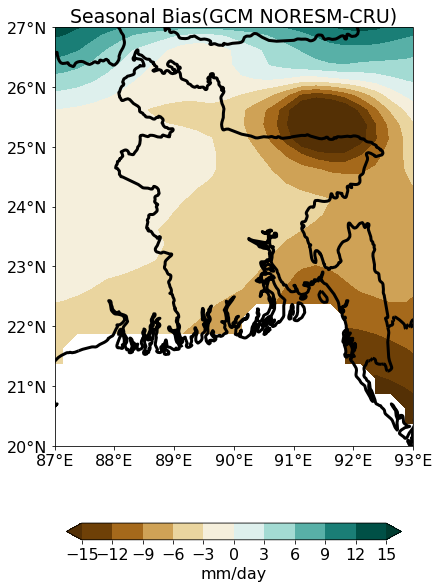

In [26]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[:,:],
                levels=np.arange(-15,15+3,3),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-15,15+3,3),  orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)



plt.title('Seasonal Bias(GCM NORESM-CRU)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(gcm noresm-cru).png")




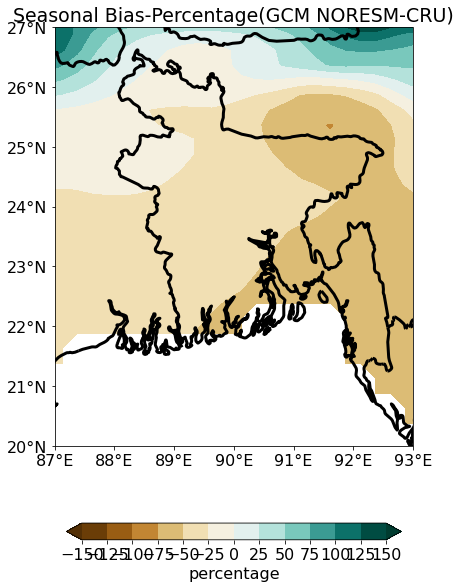

In [27]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'][:], bias_percentage['lat'][:],bias_percentage[:,:],
                levels=np.arange(-150,150+25,25), transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 
    
plt.title('Seasonal Bias-Percentage(GCM NORESM-CRU)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(gcm noresm-cru).png")





In [24]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r